# Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data

In [2]:
# Read Data
df = pd.read_csv("hotel_bookings.csv", index_col="index")
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
index,,,,,,,,,,,,,,,,,,,,,
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015


### Data preprocessing

In [3]:
# Drop any duplicates and null
df.drop_duplicates()
df.dropna()
df.shape

(119390, 32)

In [4]:
# Copy data for later use
data = df.copy()

# Visualization

### Visualized yearly bookings

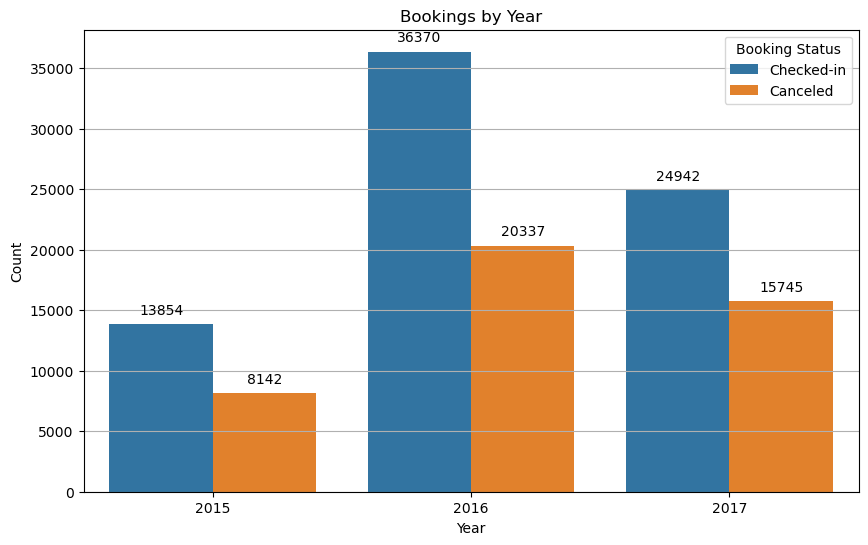

In [5]:
# Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
        
plt.title('Bookings by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Checked-in', 'Canceled'])
plt.grid(axis='y')
plt.show()

We only have complete data in year 2016, the reason it shows more bookings than previous and succeeding year.

### Yearly bookings by hotel type

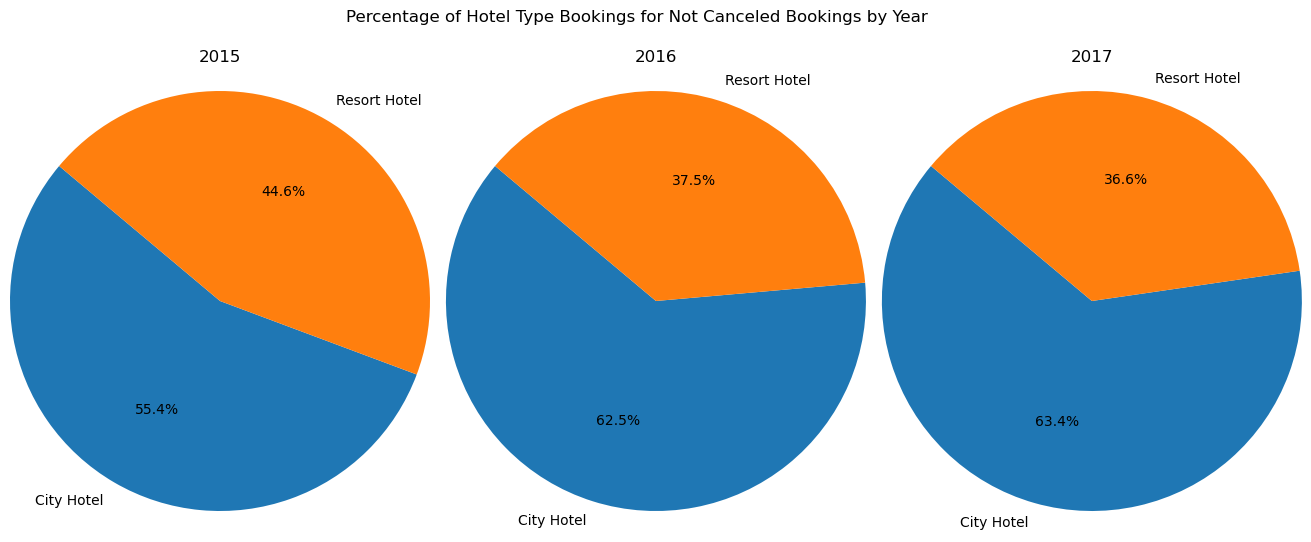

In [6]:
not_canceled_data = df[df['is_canceled'] == 0]

# Group the filtered data by arrival year and hotel type
grouped_data = not_canceled_data.groupby(['arrival_date_year', 'hotel']).size().unstack(fill_value=0)

# Plotting the pie charts for each year
years = grouped_data.index

fig, axes = plt.subplots(1, len(years), figsize=(15, 6), sharey=True, gridspec_kw={'wspace': 0.5})
fig.suptitle('Percentage of Hotel Type Bookings for Not Canceled Bookings by Year')

for i, year in enumerate(years):
    axes[i].set_title(year)
    axes[i].pie(grouped_data.loc[year], labels=grouped_data.columns, autopct='%1.1f%%', startangle=140)
    axes[i].axis('equal')

plt.show()

We can infer that theres is more bookings on City Hotels than Resort Hotel. Probable reasons might be there is more to see in the city and businesses also thrive in the city that explains more bookings in city hotels. Resort Hotel on the other hand might be located on remote locations.

### Monthly Bookings

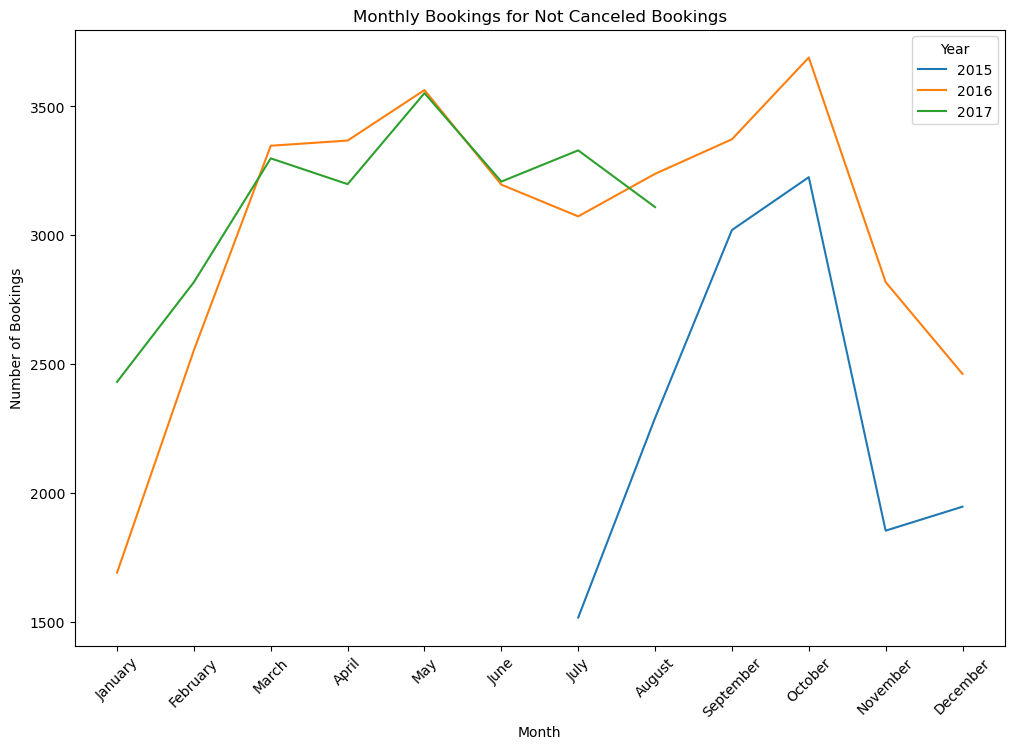

In [7]:
not_canceled_data = df[df['is_canceled'] == 0].copy()

# Convert 'arrival_date_year' and 'arrival_date_month' to a datetime column
not_canceled_data['arrival_date'] = pd.to_datetime(not_canceled_data['arrival_date_year'].astype(str) + '-' + not_canceled_data['arrival_date_month'], format='%Y-%B')

# Group the data by 'arrival_date_year' and 'arrival_date_month' and count the number of bookings
monthly_bookings = not_canceled_data.groupby(['arrival_date_year', 'arrival_date_month']).size().unstack()

# Reindex the DataFrame to arrange months from January to December
months_order = pd.date_range(start='2022-01-01', end='2022-12-31', freq='MS').strftime('%B')
monthly_bookings = monthly_bookings.reindex(columns=months_order)

# Plot the time series for each year separately
plt.figure(figsize=(12, 8))
for year in monthly_bookings.index:
    plt.plot(monthly_bookings.columns, monthly_bookings.loc[year], label=year)

plt.title('Monthly Bookings for Not Canceled Bookings')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()

We can see that there is an incomplete data in year 2015 and 2017. Nonetheless we can infer that there is more bookings at  months of March to May and August to October. This shows that there is a seasonality in hotel bookings.

### Correlation Matrix

In [8]:
data['demand'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,demand
index,,,,,,,,,,,,,,,,,,,,,
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015,2


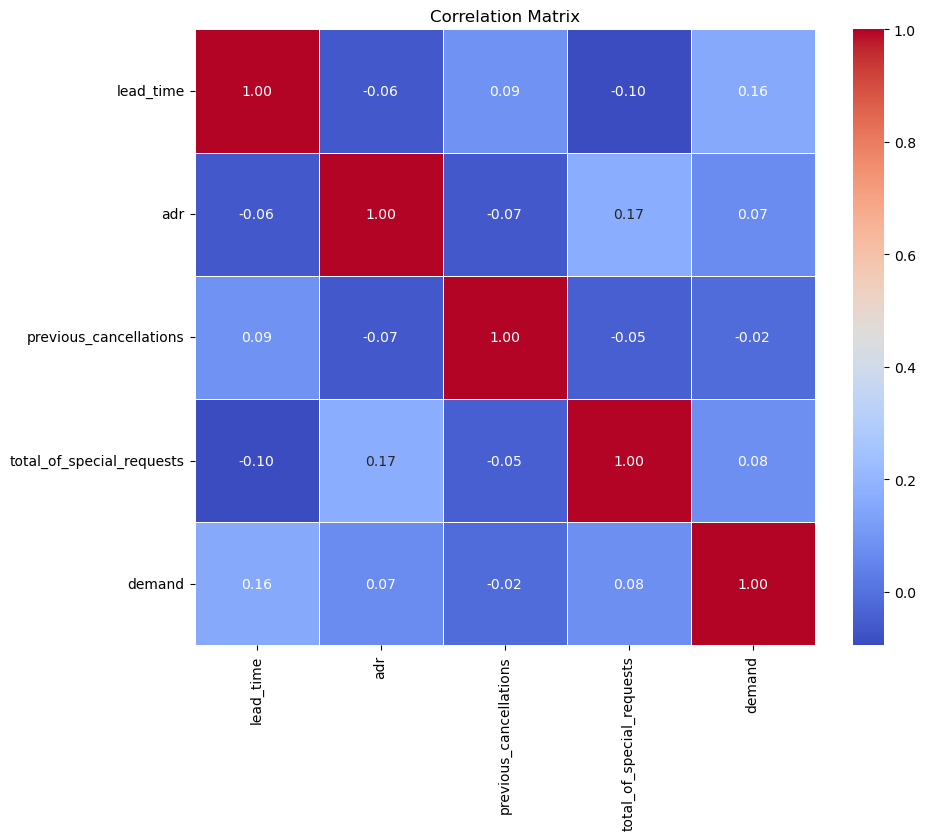

In [18]:
relevant_columns = ['lead_time', 'adr', 'previous_cancellations', 'total_of_special_requests', 'demand']
filtered_data = data[relevant_columns]

# Calculate correlation matrix
correlation_matrix = filtered_data.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can infer that there's no strong correlation between average daily rate of price per room for the bookings made in weekdays and weekend demand. There's also no significant correlation on chosen features that affects the average daily rate.